# Check the particle Tracking data 

1. Imort .mat file 
2. Plot the data with the correct axis

3. Create an alternate axs for the 

4. IMP>> check whether the 

5. The is for 7.4 percent 


In [43]:
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import os.path
# plotting imports
import matplotlib.pyplot as plt
# Now call in the pandas 
import pandas as pd  
%matplotlib inline 

import h5py
plt.style.use(["classic"])
import pandas as pd
# makes all latex into regular font type and removes default "italics"... very useful
plt.rcParams['mathtext.default'] = 'regular'

## Define a function to do all the transformation crap in one go

In [44]:
# Define a function to clean the velocity vector
def vortex_data_ETL(matrix_path, v_cutoff):
    # Initialise the dataframes 
    XY_vector = pd.DataFrame();
    
    f = h5py.File(matrix_path, 'r')
    MATLAB_data = {}
    for k, v in f.items():
        MATLAB_data[k] = np.array(v)
    
    #  build the pandas dataframe
    c = 0;
    for i in['X','Y','R','$\theta$','Vx','Vy','V$_0$','V$_r$',r'V$_\varphi$']:
        XY_vector[i] = (MATLAB_data['XY_vector'])[c];
        c +=1;
    
    # apply velocity cutoff
    XY_vector = XY_vector[XY_vector['V$_0$']>v_cutoff];
    
    return XY_vector

# perform the statistical averzging for the data sets
def Compute_Bin_data(XY_vector, particle):
    
    # denfine the bin edges
    edges = np.linspace(1,600,16);
    
    # create another column with the BIN IDs
    XY_vector['binID'] = np.digitize(XY_vector['R'], edges, right=False)
    
    # Create a new table of bin data with the mean of all th ebin means of all columns in XY_vector
    binData = XY_vector.groupby(by=['binID']).mean()
    
    # define the edges and the elementary area and the central value of R
    R_bins = np.insert((binData['R']).values,0,0)
    dA = 0.5*( R_bins[1:]**2 - R_bins[:-1]**2)  
    
    # define the centre for each bin.
    binData['centre'] = 0.5*(R_bins[1:] + R_bins[:-1])

    # Comopute the mean polarisation in each bin 
    binData[r'$\Pi_{\varphi}$'] = np.sqrt((binData['V$_r$']/binData['V$_0$'])**2 + (binData[r'V$_\varphi$']/binData['V$_0$'])**2)
    
    # compute the density in area fraction within each bin.
    binData['$\rho$'] = XY_vector.groupby(by=['binID']).size()/(dA*42480)*(np.pi*(particle/0.8621)**2)
    
    return binData 

In [5]:
# Extract the XY_vectors correctly afterimporting the .mat files

# for F 
matrix_path_F  ='E:\9.5.22_Vortex_Experiments\mixture\smaller_surprise\constant_density_high\density_7.4_percent\LoopFigures\colloidF15h16_2x2x_243fps_4db_2ms_150V_files_binData.mat';
matrix_path_F = os.path.normpath(matrix_path_F).replace('\\','/');
# for NF
matrix_path_NF ='E:\9.5.22_Vortex_Experiments\mixture\smaller_surprise\constant_density_high\density_7.4_percent\LoopFigures\colloidNF15h16_2x2x_243fps_4db_2ms_150V_files_binData.mat';
matrix_path_NF = os.path.normpath(matrix_path_NF).replace('\\','/');

v_cutoff_F  = 2;
v_cutoff_NF = 1;
particle_F  = 5;
particle_NF = 3.5;
XY_vector_F = vortex_data_ETL(matrix_path_F, v_cutoff_F);
XY_vector_NF = vortex_data_ETL(matrix_path_NF, v_cutoff_NF);

# perform the statistical averaging for the data sets.
binData_F = Compute_Bin_data(XY_vector_F,particle_F);
binData_NF = Compute_Bin_data(XY_vector_NF, particle_NF);


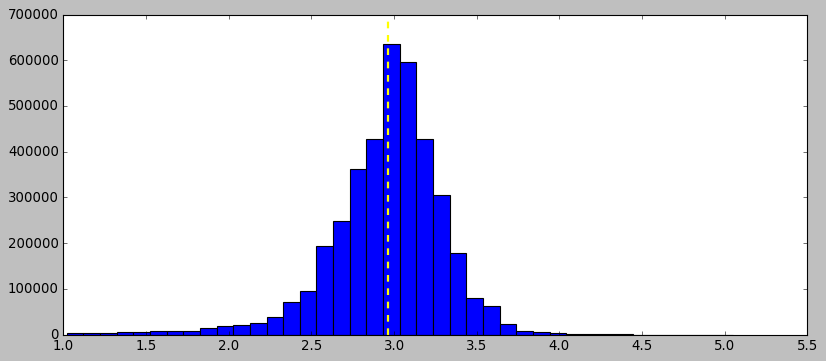

In [6]:
plt.figure(figsize  = (12,5))
#for i in range(1,16):
    #xF = XY_vector_F[XY_vector_F['binID'] ==16 - i ]['V$_0$']
    #plt.hist(xF,40)
    #plt.axvline(xF.mean(), color='orange', linestyle='dashed', linewidth=2)
xNF = XY_vector_NF[XY_vector_NF['binID'] ==10 ]['V$_0$']
 
plt.hist(xNF,40)
plt.axvline(xNF.mean(), color='yellow', linestyle='dashed', linewidth=2)
## Conclusion: the max value of the velocity are very close to the mode of the particle 
## True for all cases 
## Next steps: make a massive flocka nd check this out. 

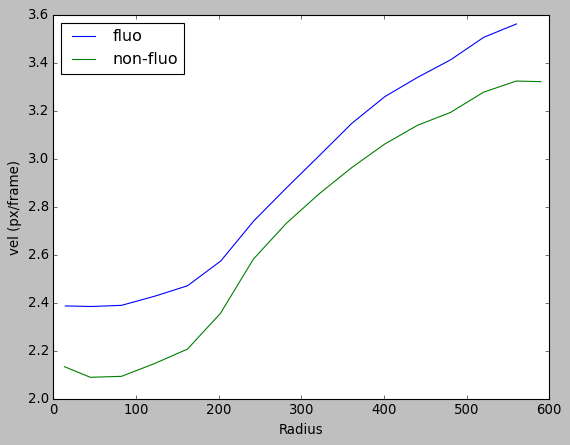

In [19]:
# these are what they are:
plt.plot(binData_F['centre'],binData_F['V$_0$'], label ='fluo')
plt.plot(binData_NF['centre'],binData_NF['V$_0$'], label ='non-fluo')
#plt.plot(binData_F['centre'], Net_field_velocity, label ='total velocity',)
#plt.plot(binData_F['centre'],binData_F['V$_0$'] - binData_NF['V$_0$'], label ='difference')
plt.legend(loc= 'best')
plt.xlabel('Radius')
plt.ylabel('vel (px/frame)')
plt.savefig('velocity.pdf',dpi=300)

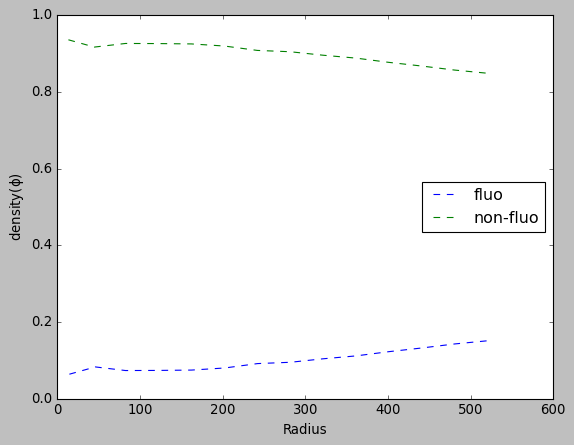

In [30]:
## do the above thing for the particle density
plt.plot(binData_F['centre'][:-1],binData_F['$\rho$'][:-1]/(binData_F['$\rho$'][:-1]+binData_NF['$\rho$'][:-2]), label ='fluo', linestyle = '--')
plt.plot(binData_NF['centre'][:-1],binData_NF['$\rho$'][:-1]/(binData_F['$\rho$'][:-1]+binData_NF['$\rho$'][:-2]), label ='non-fluo', linestyle = '--')
plt.legend(loc= 'best')
plt.xlabel('Radius')
plt.ylabel('density($\phi$)')
plt.savefig('density_7.4.pdf',dpi=300)

In [27]:
binData_NF['$\rho$'][:-1]/(binData_F['$\rho$'][:-1]+binData_NF['$\rho$'][:-2])

binID
1     0.935434
2     0.916468
3     0.925877
4     0.925584
5     0.924678
6     0.919190
7     0.907768
8     0.904360
9     0.895291
10    0.887808
11    0.876713
12    0.867138
13    0.856630
14    0.848295
15         NaN
Name: $\rho$, dtype: float64

In [28]:
len(XY_vector_F)/len(XY_vector_NF)*100


7.305339215836624

binID
1     0.064566
2     0.083532
3     0.074123
4     0.074416
5     0.075322
6     0.080810
7     0.092232
8     0.095640
9     0.104709
10    0.112192
11    0.123287
12    0.132862
13    0.143370
14    0.151705
Name: $\rho$, dtype: float64


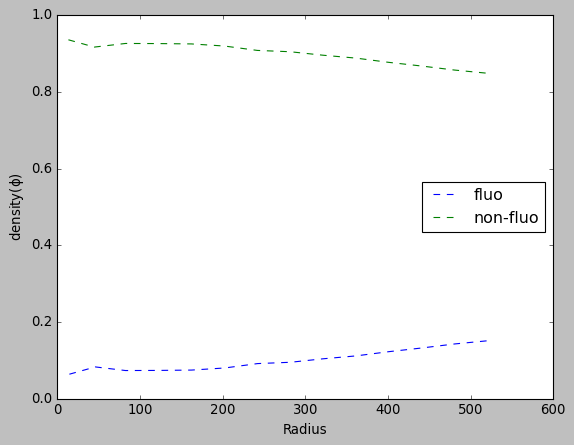

In [38]:
## do the above thing for the particle density
plt.plot(binData_F['centre'][:-1],binData_F['$\rho$'][:-1]/(binData_F['$\rho$'][:-1]+binData_NF['$\rho$'][:-2]), label ='fluo', linestyle = '--')
plt.plot(binData_NF['centre'][:-1],binData_NF['$\rho$'][:-1]/(binData_F['$\rho$'][:-1]+binData_NF['$\rho$'][:-2]), label ='non-fluo', linestyle = '--')
plt.legend(loc= 'best')
plt.xlabel('Radius')
plt.ylabel('density($\phi$)')
#plt.savefig('density.pdf',dpi=300)
print(binData_F['$\rho$'][:-1]/(binData_F['$\rho$'][:-1]+binData_NF['$\rho$'][:-2]))

In [ ]:
# compute other parameters
# radial local momentum 
## do the above thing for the particle density
plt.plot(binData_F['centre'][:-1],binData_F['$\rho$'][:-1]*binData_F[r'$\Pi_{\varphi}$'][:-1]*binData_F['V$_0$'][:-1], label ='fluo', linestyle = '--')
plt.plot(binData_F['centre'][:-1],binData_NF['$\rho$'][:-1]*binData_NF[r'$\Pi_{\varphi}$'][:-1]*binData_NF['V$_0$'][:-1], label ='non-fluo', linestyle = '--')
plt.plot(binData_F['centre'][:-1],binData_F['$\rho$'][:-1]*binData_F[r'$\Pi_{\varphi}$'][:-1]*binData_F['V$_0$'][:-1]+binData_NF['$\rho$'][:-1]*binData_NF[r'$\Pi_{\varphi}$'][:-1]*binData_NF['V$_0$'][:-1], label ='total density',color ='k', linestyle = '--')
#plt.plot(binData_F['centre'][:-1],binData_NF['$\rho$'][:-1]- binData_F['$\rho$'][:-1], label ='difference', color = 'orange')
plt.title(r'Local angular momentum $(\Pi\phi V_{\varphi})$')
plt.legend(loc= 'best')
plt.xlabel('Radius')
plt.ylabel(r'$\Pi\phi V_{\varphi}$(r)')
plt.savefig('local angular momentun.pdf',dpi=300)

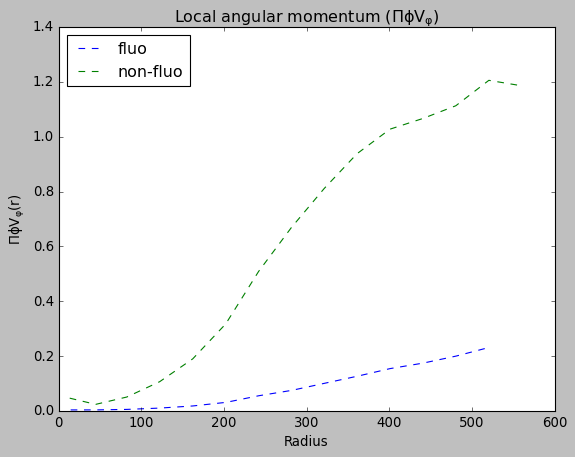

In [20]:
# compute other parameters
# radial local momentum 
## do the above thing for the particle density
plt.plot(binData_F['centre'][:-1],binData_F['$\rho$'][:-1]*binData_F[r'$\Pi_{\varphi}$'][:-1]*binData_F['V$_0$'][:-1], label ='fluo', linestyle = '--')
plt.plot(binData_NF['centre'][:-1],binData_NF['$\rho$'][:-1]*binData_NF[r'$\Pi_{\varphi}$'][:-1]*binData_NF['V$_0$'][:-1], label ='non-fluo', linestyle = '--')
#plt.plot(binData_F['centre'][:-1],binData_F['$\rho$'][:-1]*binData_F[r'$\Pi_{\varphi}$'][:-1]*binData_F['V$_0$'][:-1]+binData_NF['$\rho$'][:-1]*binData_NF[r'$\Pi_{\varphi}$'][:-1]*binData_NF['V$_0$'][:-1], label ='total density',color ='k', linestyle = '--')
#plt.plot(binData_F['centre'][:-1],binData_NF['$\rho$'][:-1]- binData_F['$\rho$'][:-1], label ='difference', color = 'orange')
plt.title(r'Local angular momentum $(\Pi\phi V_{\varphi})$')
plt.legend(loc= 'best')
plt.xlabel('Radius')
plt.ylabel(r'$\Pi\phi V_{\varphi}$(r)')
plt.savefig('local angular momentun.pdf',dpi=300)

In [ ]:
# compute other parameters
# radial local momentum 
## do the above thing for the particle density
Total_phi_V = (binData_F[r'$\Pi_{\varphi}$'][:-1]*binData_F['V$_0$'][:-1]+binData_NF['$\rho$'][:-1]*binData_NF[r'$\Pi_{\varphi}$'][:-1]*binData_NF['V$_0$'][:-1])/(binData_F['$\rho$'][:-1] +binData_NF['$\rho$'][:-1])
plt.plot(binData_F['centre'][:-1],binData_F[r'$\Pi_{\varphi}$'][:-1], label ='fluo', linestyle = '--')
plt.plot(binData_F['centre'][:-1],binData_NF[r'$\Pi_{\varphi}$'][:-1], label ='non-fluo', linestyle = '--')
#plt.plot(binData_F['centre'][:-1],Total_phi_V, label ='total density',color ='k', linestyle = '--')
#plt.plot(binData_F['centre'][:-1],binData_NF['$\rho$'][:-1]- binData_F['$\rho$'][:-1], label ='difference', color = 'orange')
plt.title(r'Polarisation $(\pi)$')
plt.legend(loc= 'best')
plt.xlabel('Radius')
plt.ylabel(r'$\Pi V_{\varphi}$(r)')
plt.savefig('local angular momentun.pdf',dpi=300)

In [ ]:
# compute other parameters # radial local momentum 
## do the above thing for the particle density
plt.plot(binData_F['centre'][:-1],binData_F['$\rho$'][:-1]/(np.pi*(5/0.8621)**2), label ='fluo', linestyle = '--')
plt.plot(binData_F['centre'][:-1],binData_NF['$\rho$'][:-1]/(np.pi*(3.5/0.8621)**2), label ='non-fluo', linestyle = '--')
plt.plot(binData_F['centre'][:-1],binData_F['$\rho$'][:-1]/(np.pi*(5/0.8621)**2)+binData_NF['$\rho$'][:-1]/(np.pi*(3.5/0.8621)**2), label ='total density',color ='k', linestyle = '--')
#plt.plot(binData_F['centre'][:-1],binData_NF['$\rho$'][:-1]- binData_F['$\rho$'][:-1], label ='difference', color = 'orange')
plt.title('Local angular momentum $(\Pi\phi)$')
plt.legend(loc= 'best')
plt.xlabel('Radius')
plt.ylabel('density(#/px$^2$)')
plt.savefig('number density.pdf',dpi=300)

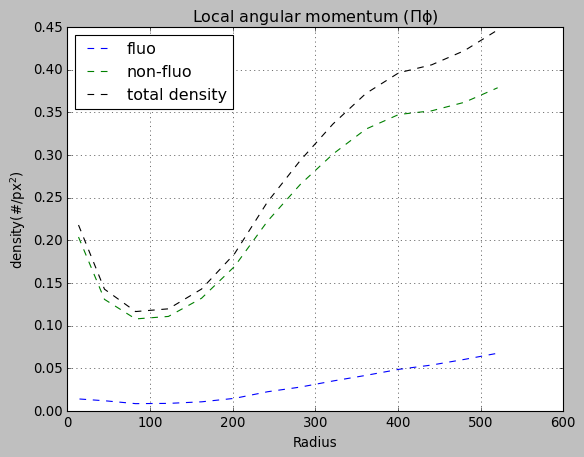

In [34]:
# compute other parameters # radial local momentum 
## do the above thing for the particle density
plt.plot(binData_F['centre'][:-1],binData_F['$\rho$'][:-1], label ='fluo', linestyle = '--')
plt.plot(binData_NF['centre'][:-2],binData_NF['$\rho$'][:-2], label ='non-fluo', linestyle = '--')
plt.plot(binData_NF['centre'][:-2],binData_F['$\rho$'][:-1]+binData_NF['$\rho$'][:-2], label ='total density',color ='k', linestyle = '--')
plt.grid(True)
plt.title('Local angular momentum $(\Pi\phi)$')
plt.legend(loc= 'best')
plt.xlabel('Radius')
plt.ylabel('density(#/px$^2$)')
plt.savefig('Plots/number density.pdf',dpi=300)